# Where Should I Live
Group Project : Programming for Data Science 2025/26

Group 22:
- A. K. M. Saif Hoque
- Daniyal Ahmad
- Ali Fardin Gulistani
- Atila Soleimanian

### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 

- [1. Data Wrangling and Analysis](#P1)
- [2. Advanced Topic - Building an Interactive Map](#P2)
- [3. Data Science in Action](#P3)

---

## <font color='#BFD72F'>1. Data Wrangling and Analysis </font> <a class="anchor" id="P1"></a>
  [Back to TOC](#toc)

Importing the dataset and the required libraries, not that if the following are not installed on your machine, you can install them by using `!pip intall ...`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('./data/city_data.csv',sep='|', skiprows=1)

In [3]:
df.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


Now we look at the structure of the dataframe and see some statistics of the data.

In [4]:
print(f'The shape of the dataset is {df.shape}')     

The shape of the dataset is (86, 14)


In [5]:
df.columns

Index(['City', 'Population Density', 'Population', 'Working Age Population ',
       'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Avgerage Rent Price',
       'Average Cost of Living', 'Average Price Groceries',
       'Last Data Update'],
      dtype='object')

There are some typos that need to be fixed in the columns names.
- `Working Age Population ` to `Working Age Population`
- `Avgerage Rent Price` to `Average Rent Price`
- `Days of very strong heat stress` to `Days of Very Strong Heat Stress`

In [6]:
df = df.rename(columns={
        'Avgerage Rent Price': 'Average Rent Price',
        'Working Age Population ': 'Working Age Population',
        'Days of very strong heat stress': 'Days of Very Strong Heat Stress'
    })

Also, the the order of country for the 45th row is wrong since the name of the country should come first.

In [7]:
df.iloc[45,0] = 'Athens,Greece'

The separator character for `Main Spoken Languages` is `,` , however, for Valencia, is with semicolon. 
Additionaly some `City` records are divided with a dot, we will also change them to comma for consistency.

In [8]:
df['Main Spoken Languages'] = df['Main Spoken Languages'].str.replace(';', ',')
df['City'] = df['City'].str.replace('.', ',')
df['City'] = df['City'].str.replace(';', ',')

To simplify future works with the City and the Country, let's create separate columns for them.

In [9]:
df['Country'] = df['City'].str.split(',', expand=True)[1]
df['City'] = df['City'].str.split(',', expand=True)[0]

# Move the columns to the front
cols = ['City', 'Country'] + [c for c in df.columns if c not in ['City', 'Country']]
df = df[cols]

And we also remove redundant spaces:

In [10]:
df['City'] = df['City'].str.replace(' ', '')
df['Country'] = df['Country'].str.replace(' ', '')

We also change the data type of `Last Data Update` to datetime object.

In [11]:
df['Last Data Update'] = pd.to_datetime(df['Last Data Update'])

After cleaning our dataset, we export for future use:

In [15]:
df.to_csv("./data/city_data_clean.csv", index=False)

### 1.1 Missing and Duplicate Values

How did you handle missing values and duplicate records in the dataset?
Justify your approach?

To address this question, we first identify and remove the duplicate values and then we will handle the missing values.


In [12]:
df[df.duplicated(keep=False)]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29
16,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29
32,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27
33,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27


So we can see that there are two duplicated records for Berlin and Malaga. We simply drop them and reset the index of our data frame.

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

Average Price Groceries            78
Unemployment Rate                   1
Population Density                  1
GDP per Capita                      1
Main Spoken Languages               1
Working Age Population              1
Country                             0
Youth Dependency Ratio              0
Population                          0
City                                0
Days of Very Strong Heat Stress     0
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Last Data Update                    0
dtype: int64

As we can see, there are 78 missing values in the `Average Price Groceries` column, and also some in the other columns. Before proceeding, let's first get a sense of our data using `.info()` and `.describe()` to better handle the missing values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               83 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           83 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                83 non-null     float64       
 7   GDP per Capita                   83 non-null     float64       
 8   Days of Very Strong Heat Stress  84 non-null     int64         
 9   Main Spoken Languages            83 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


In [16]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Population Density,83.0,1.131470e+03,2.571287e+03,65.00,293.500,548.00,1039.00,20983.0
Population,84.0,1.722653e+06,1.821192e+06,73895.00,518501.500,1178397.00,2259440.00,12396541.0
Working Age Population,83.0,1.137206e+06,1.218990e+06,46359.00,352900.500,733794.00,1490012.50,8274794.0
Youth Dependency Ratio,84.0,2.413726e+01,3.290351e+00,19.30,21.475,23.15,26.05,37.8
Unemployment Rate,83.0,6.557831e+00,4.438197e+00,1.40,3.700,5.30,7.80,23.0
GDP per Capita,83.0,5.210278e+04,2.158282e+04,10089.92,38790.000,49588.00,63311.50,146094.0
Days of Very Strong Heat Stress,84.0,4.416667e+00,1.014617e+01,0.00,0.000,1.00,3.00,59.0
Average Monthly Salary,84.0,2.428167e+03,1.199607e+03,750.00,1400.000,2400.00,3200.00,6636.0
Average Rent Price,84.0,1.065440e+03,5.039515e+02,100.00,775.000,1050.00,1250.00,3190.0
Average Cost of Living,84.0,1.808583e+03,7.340961e+02,800.00,1287.500,1665.00,2100.00,4862.0


After analyzing our data we reached the following decisions to handle our missing data.

- We drop the `Average Price Groceries` column since out of 84 entries 78 are missing. 
- For the other 5 features with missing values, we will use different imputation methods.

In [17]:
df = df.drop(columns=['Average Price Groceries'])

#### Handling `Working Age Population`

We fill the missing `Working Age Population` by estimating it from the city’s population using the median working-age ratio across the dataset, then rounds the result and shows the filled rows.

This way we preserves the natural relationship between `Working Age Population` and `Population` to avoid distortions from outliers.

In [18]:
missing_working_age = df['Working Age Population'].isna()
df[missing_working_age]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
23,Dusseldorf,Germany,1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15


In [19]:
working_age_ratio = (df['Working Age Population'] / df['Population']).median()
df.loc[missing_working_age, 'Working Age Population'] = (df.loc[missing_working_age, 'Population'] * working_age_ratio).round()
df[missing_working_age]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
23,Dusseldorf,Germany,1295.0,1554077,1024128.0,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15


#### Handling `Unemployment Rate`

Here we fill the missing `Unemployment Rate` value using the median for each country, keeping cities aligned with their national conditions, and then fills any remaining gaps with the overall median only if a country has no valid data at all, in this case Belgium have other cities available in our dataset, therefore, we use the median of those values.

In [20]:
missing_unemployment_rate = df['Unemployment Rate'].isna()
missing_country = df[missing_unemployment_rate]['Country'].iloc[0]
df[df['Country'] == missing_country]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
2,Brussels,Belgium,681.0,3284548,2137425.0,27.50,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,Antwerp,Belgium,928.0,1139663,723396.0,27.70,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,Gent,Belgium,552.0,645813,417832.0,24.80,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
5,Bruges,Belgium,840.0,119765,74600.0,25.63,5.6,63083.0,0,"Dutch, French",2700,1250,1708,2023-10-25


In [21]:
df['Unemployment Rate'] = df['Unemployment Rate'].fillna(
    df.groupby('Country')['Unemployment Rate'].median().loc[missing_country]
)

df[missing_unemployment_rate]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
4,Gent,Belgium,552.0,645813,417832.0,24.8,6.2,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17


#### Handling `GDP Per Capita`

Since Cyprus has another city in the dataset, we can simply use that city's `GDP per Capita` value to fill the missing one — using Lefkosia’s value for Lemessos ensures the estimate stays consistent within the country.

In [22]:
missing_gdp = df['GDP per Capita'].isna()
miss_gdp_country = df.loc[missing_gdp, 'Country'].iloc[0]
df[df['Country'] == miss_gdp_country]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
11,Lefkosia,Cyprus,130.0,356400,237000.0,23.06,9.6,34907.0,45,"Greek, Turkish, English",1486,700,1350,2024-04-08
12,Lemesos,Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,2023-08-14


In [23]:
df['GDP per Capita'] = df['GDP per Capita'].fillna(df.iloc[11]['GDP per Capita'])
df[missing_gdp]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
12,Lemesos,Cyprus,190.0,262238,173906.0,23.06,11.2,34907.0,0,"Greek, English, Russian",2500,1400,2300,2023-08-14


#### Handling `Population Density`

Like before we fill the missing `Population Density` value for Valencia using the median of that column for Spain.

In [24]:
missing_pop_density = df['Population Density'].isna()
miss_pop_den_country = df[missing_pop_density]['Country'].iloc[0]
df[df['Country'] == miss_pop_den_country]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
27,Madrid,Spain,873.0,6882461,4617753.0,23.0,10.8,51020.0,18,Spanish,2271,1100,1589,2023-05-14
28,Barcelona,Spain,1918.0,5034925,3331345.0,22.6,11.0,45016.0,0,"Spanish, Catalan",2094,1450,1630,2024-10-18
29,Valencia,Spain,NaN,1748142,1162828.0,22.6,13.7,33570.0,5,"Spanish,Valencian",2400,1190,1300,2023-06-04
30,Seville,Spain,330.0,1549641,1037225.0,25.0,21.6,30004.0,53,Spanish,2300,650,1150,2024-09-01
31,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,2023-11-27


In [25]:
df['Population Density'] = df['Population Density'].fillna(
    df.groupby('Country')['Population Density'].median().loc['Spain']
)

df[missing_pop_density]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
29,Valencia,Spain,722.0,1748142,1162828.0,22.6,13.7,33570.0,5,"Spanish,Valencian",2400,1190,1300,2023-06-04


#### Handling `Main Spoken Languages`

`Main Spoken Languages` is a categorical variable, we found the the most common language (mode) among German cities and uses it to fill missing entries, ensuring that the imputed value is consistent with other cities in the same country.

In [26]:
missing_language = df['Main Spoken Languages'].isna()
miss_lang_country = df[missing_language]['Country'].iloc[0]
df[df['Country'] == miss_lang_country]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
15,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,2023-06-29
16,Hamburg,Germany,461.0,3315036,2181857.0,21.5,3.2,61058.0,0,"German, English, Turkish",3500,1100,2100,2024-07-10
17,Munich,Germany,529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16
18,Cologne,Germany,1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,2024-11-23
19,FrankfurtamMain,Germany,631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04
20,Stuttgart,Germany,763.0,2787449,1843613.0,21.2,2.5,67644.0,3,"German, Turkish",3300,1300,2300,2024-05-19
21,Leipzig,Germany,263.0,1043613,662617.0,21.4,4.3,41097.0,3,German,2800,800,1600,2023-07-30
22,Dresden,Germany,231.0,1343213,818095.0,23.0,3.8,39767.0,0,German,3050,800,1530,2023-08-01
23,Dusseldorf,Germany,1295.0,1554077,1024128.0,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15
24,Hanover,Germany,444.0,1316467,854349.0,21.0,4.0,54827.0,2,German,2800,900,1800,2023-10-07


In [27]:
df['Main Spoken Languages'] = df['Main Spoken Languages'].fillna(
    df.groupby('Country')['Main Spoken Languages'].apply(lambda x: x.mode()[0]).loc[miss_lang_country]
)

df[missing_language]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
23,Dusseldorf,Germany,1295.0,1554077,1024128.0,21.4,3.3,71238.0,3,German,3200,1100,2050,2024-01-15


### 1.2.a Which country appears most frequently in the dataset? How many cities are associated with it?

In [28]:
country_frequency = df['Country'].value_counts().sort_values(ascending=False)
most_common_country = country_frequency.index[0]
city_counts = country_frequency.iloc[0]

print(f'The most frequent country in the dataset is {most_common_country} which {city_counts} cities are associated with it')

The most frequent country in the dataset is Germany which 10 cities are associated with it


In [29]:
fig = px.bar(x=country_frequency.index,
             y=country_frequency.values,
             labels={'x': 'Country', 'y': 'Number of Cities'}, 
             title='Number of Cities per Country in Dataset') 
fig.show()

### 1.2.b How many cities are present in total? How many are associated with Greece?

In [30]:
total_cities = len(df)
print(f'There are {total_cities} cities present in toal')

There are 84 cities present in toal


In [31]:
greek_cities = df[df['Country'] == 'Greece']
greek_cities


,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
43,Athens,Greece,1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
44,Thessaloniki,Greece,381.0,1050568,684564.0,22.2,19.9,23940.0,10,Greek,1000,550,1100,2023-12-21


In [32]:
print(f'There are {len(greek_cities)} cities associated with Greece which are {list(greek_cities['City'].values)}')

There are 2 cities associated with Greece which are ['Athens', 'Thessaloniki']


### 1.2.c Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

The Main Spoken Language column currently has languages as a single comma-separated string. First, we convert it into a list of languages. Then, explode this list so that each language gets its own row for each city.

In [33]:
df[['City', 'Main Spoken Languages']].head()

,City,Main Spoken Languages
0,Vienna,"German, English, Turkish, Serbian"
1,Salzburg,German
2,Brussels,"French, Dutch, Arabic, English"
3,Antwerp,"Dutch, French, Arabic"
4,Gent,"Dutch, French"


In [34]:
lang_series = (df['Main Spoken Languages'].str.split(', '))
lang_exploded = lang_series.explode()
    
lang_counts = lang_exploded.value_counts()
print(f'Top 3 most spoken languages are:\n {lang_counts.head(3)}')

Top 3 most spoken languages are:
 Main Spoken Languages
English    46
German     15
Turkish    10
Name: count, dtype: int64


In [35]:
fig = px.bar(
    x=lang_counts.index,
    y=lang_counts.values,
    labels={'x': 'Language', 'y': 'Cities'},
    title='Language Spoken in Cities',
    color_discrete_sequence=['orange']
)
fig.show()

### 1.3.a Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [36]:
threshold_date = pd.to_datetime("2023-04-01")
cities_update_needed = df[df['Last Data Update'] < threshold_date][
    ['City', 'Country', 'Last Data Update']
]
print("Update required for the following cities (before 2023-04-01):")
cities_update_needed

Update required for the following cities (before 2023-04-01):


,City,Country,Last Data Update
10,Basel,Switzerland,2023-01-19
17,Munich,Germany,2023-03-16
19,FrankfurtamMain,Germany,2023-02-04
36,Lyon,France,2023-03-31
57,Venice,Italy,2023-03-23
80,Gothenburg,Sweden,2023-03-10


### 1.3.b How many days ago was the last update? On what day, month, and year did it occur?

In [37]:
today = pd.Timestamp.now().normalize()
df['Days since update'] = (today - df['Last Data Update']).dt.days

df[['City', 'Country', 'Last Data Update', 'Days since update']].sort_values('Days since update', ascending=False).head(10)

,City,Country,Last Data Update,Days since update
10,Basel,Switzerland,2023-01-19,1046
19,FrankfurtamMain,Germany,2023-02-04,1030
80,Gothenburg,Sweden,2023-03-10,996
17,Munich,Germany,2023-03-16,990
57,Venice,Italy,2023-03-23,983
36,Lyon,France,2023-03-31,975
38,London,UnitedKingdom,2023-04-09,966
2,Brussels,Belgium,2023-04-22,953
67,Bergen,Norway,2023-04-30,945
8,Zurich,Switzerland,2023-05-06,939


In [39]:
min_days = int(df['Days since update'].min())
print(f"The last record updated {min_days} days before.")

most_recent_row = df.loc[df['Last Data Update'].idxmax()]
print(f"The last update occurred on {most_recent_row['Last Data Update'].date()}")

The last record updated 353 days before.
The last update occurred on 2024-12-12


### 1.4.a How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.

Text(0.5, 1.0, 'Distribution of Age')

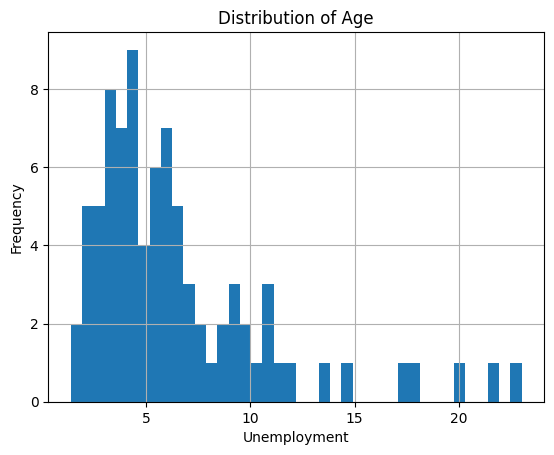

In [53]:
df['Unemployment Rate'].hist(bins=40)

plt.xlabel('Unemployment')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of GDP per Capita')

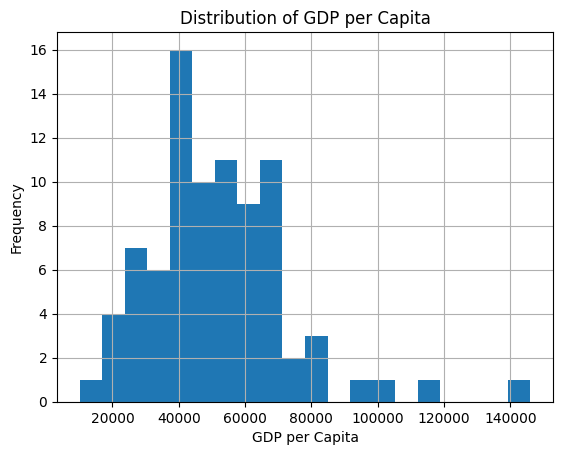

In [54]:
df['GDP per Capita'].hist(bins=20)

plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita')

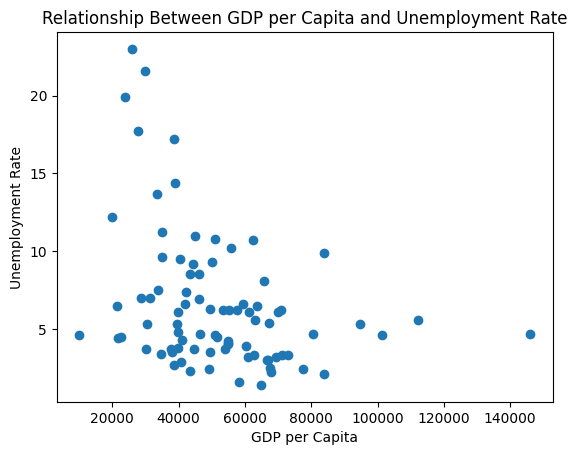

In [55]:
plt.scatter(df['GDP per Capita'], df['Unemployment Rate'])
plt.title('Relationship Between GDP per Capita and Unemployment Rate')
plt.xlabel('GDP per Capita')
plt.ylabel('Unemployment Rate')
plt.show()

In [49]:
correlation = df['GDP per Capita'].corr(df['Unemployment Rate'])
correlation

np.float64(-0.34665840861758546)

**Distribution of Unemployment Rate**

- The distribution is positively skewed (right-skewed), meaning most cities have lower unemployment rates 
- A smaller number of cities have very high unemployment, pulling the tail to the right.

**Distribution of GDP per Capita**
- The distribution is right-skewed meaning most cities have lower to medium GDP per Capita, while a smaller number have very high values.
- There are some high-income cities, but they are fewer compared to the rest.

**Relationship Between GDP per Capita and Unemployment Rate**

- There is a general downward pattern, which means cities with higher GDP per Capita tend to have lower unemployment rates.
- Although the correlation is almost -0.3, however this does not prove causation, but it shows a visible pattern that cities with higher economic output usually have lower unemployment rates.

### 1.4.b 
- Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? 
- What about the top 5 countries with the smallest average difference? 
- Show these results with meaningful visualizations

In [115]:
df['Affordability'] = df['Average Monthly Salary'] - df['Average Cost of Living']
diff = df.sort_values(by='Affordability', ascending=False)
diff[['City', 'Average Monthly Salary', 'Average Cost of Living', 'Affordability']].head()

,City,Average Monthly Salary,Average Cost of Living,Affordability
10,Basel,6366,4239,2127
34,Tampere,3500,1600,1900
33,Helsinki,3900,2050,1850
8,Zurich,6636,4862,1774
9,Geneva,5794,4263,1531


In [116]:
print(f"The top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living are {diff['City'].head().values}")

The top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living are ['Basel' 'Tampere' 'Helsinki' 'Zurich' 'Geneva']


<Axes: xlabel='City'>

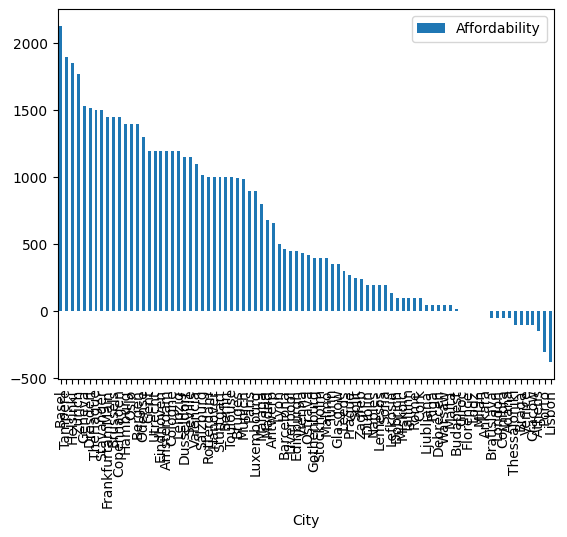

In [117]:
diff.plot(kind='bar', x='City', y='Affordability')

In [119]:
diff_by_country = df.groupby('Country').agg({'Affordability': 'mean'}).sort_values(by='Affordability', ascending=True)[['Affordability']]
diff_by_country.head()

,Affordability
Country,
Portugal,-207.500000
Greece,-125.000000
SlovakRepublic,-50.000000
Turkiye,-25.000000
Poland,-16.666667


In [121]:
print(f"The top 5 countries with the least difference between the Average Monthly Salary and Average Cost of Living are: \n{diff_by_country.head().reset_index()['Country'].values}")

The top 5 countries with the least difference between the Average Monthly Salary and Average Cost of Living are: 
['Portugal' 'Greece' 'SlovakRepublic' 'Turkiye' 'Poland']


<Axes: xlabel='Country'>

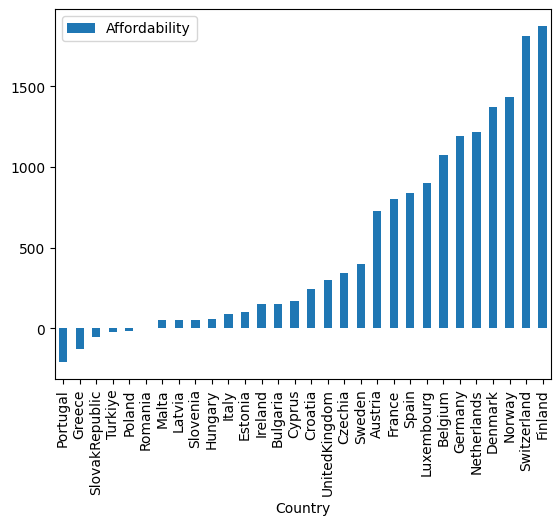

In [122]:
diff_by_country.plot(kind='bar')

### 1.4.c Which is the best city for someone seeking:
- an average monthly salary above €1600,
- a cost of living below €900, and
- a country suitable for starting a family (with a relatively larger youth
 population)?

In [133]:
candidates = df[(df['Average Monthly Salary'] > 2000) & (df['Average Cost of Living'] <= 1600)]
the_best_city = candidates.sort_values(by='Unemployment Rate', ascending=True).head(1)
the_best_city

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of Very Strong Heat Stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Days since update,Affordability
22,Dresden,Germany,231.0,1343213,818095.0,23.0,3.8,39767.0,0,German,3050,800,1530,2023-08-01,852,1520


The city of Dresden, Germany is the most suitable city for someone seeking those requirements.

<h1 style="color: red">UNTIL HERE 1/12/2025</h1>

### 5. What are three additional insights you find meaningful when comparing the given cities?

Ideas:
- Finding the best city based on economic strenght
- Best cities for long-term stability
- Cities with the lowest heat-stress days

---
## <font color='#BFD72F'>2. Advanced  Topic - Building and Interactive Map</font> <a class="anchor" id="P1"></a>
  [Back to TOC](#toc)

### 2.1 Web Scraping

### 2.2 Interactive Map

---
## <font color='#BFD72F'>3. Data Science In Action</font> <a class="anchor" id="P1"></a>
  [Back to TOC](#toc)